In [2]:
# This is an example for usage of the correlation_matrix module
import bindings.frontend as ph
import examples.pyhusky.correlation_matrix as crrmat
import examples.pyhusky.outliers as ol
import json

host = raw_input("Please input the name of your host: ")
port = int(raw_input("Please input your port number: "))

ph.env.pyhusky_start(host, port, params={'disable_progress': True})

# Getting the correlation matrix from the original data
dataurl = "/datasets/json/dianping.jl"
keys = ["ave_spent", "taste", "service", "environment"]
dictlist1 = ph.env.load(dataurl).map(lambda line: json.loads(line)).cache()
corrMat1 = crrmat.get_pairwise_correlations(dictlist1, keys)

# Removing the outliers and then getting the correlation matrix
dictlist2 = ol.rm_all_outliers(dictlist1, keys)
corrMat2 = crrmat.get_pairwise_correlations(dictlist2, keys)

Please input the name of your host: master
Please input your port number: 44443
Correlation Between ave_spent and taste = -0.078715

Correlation Between ave_spent and service = -0.067424

Correlation Between ave_spent and environment = 0.005978

Correlation Between taste and service = 0.915620

Correlation Between taste and environment = 0.918901

Correlation Between service and environment = 0.934476

Correlation Between ave_spent and taste = -0.443924

Correlation Between ave_spent and service = -0.312367

Correlation Between ave_spent and environment = -0.279476

Correlation Between taste and service = 0.731588

Correlation Between taste and environment = 0.743236

Correlation Between service and environment = 0.790558



In [3]:
%pylab inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (8,6)
from biokit.viz import corrplot
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
Creating directory /home/pedro/.config/biokit 
Creating directory /home/pedro/.config/bioservices 


In [4]:
# Correlation Matrix before removing outliers
df1 = pd.DataFrame(corrMat1, index=keys, columns=keys)
df1

ave_spent     taste   service  environment
ave_spent     1.000000 -0.078715 -0.067424     0.005978
taste        -0.078715  1.000000  0.915620     0.918901
service      -0.067424  0.915620  1.000000     0.934476
environment   0.005978  0.918901  0.934476     1.000000

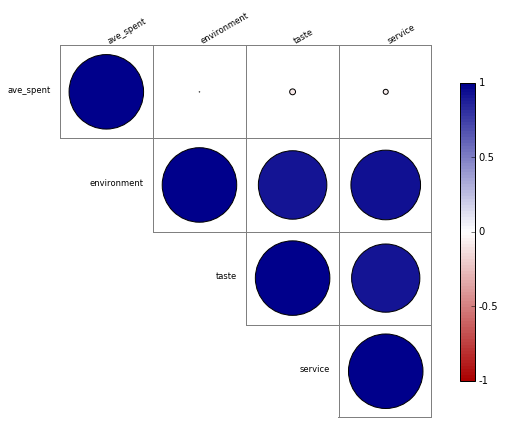

In [5]:
c1 = corrplot.Corrplot(df1)
c1.plot(colorbar=True, shrink=.8, upper="circle")

In [6]:
# Correlation Matrix after removing outliers
df2 = pd.DataFrame(corrMat2, index=keys, columns=keys)
df2

ave_spent     taste   service  environment
ave_spent     1.000000 -0.443924 -0.312367    -0.279476
taste        -0.443924  1.000000  0.731588     0.743236
service      -0.312367  0.731588  1.000000     0.790558
environment  -0.279476  0.743236  0.790558     1.000000

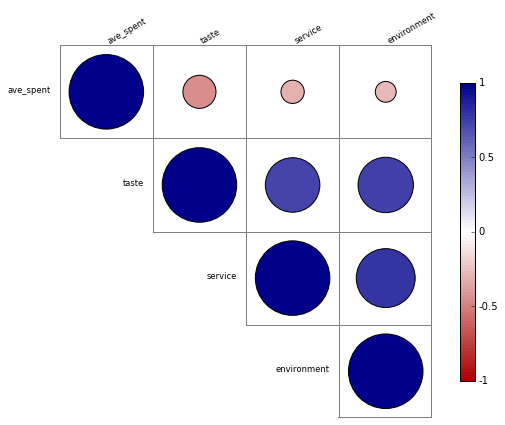

In [7]:
c2 = corrplot.Corrplot(df2)
c2.plot(colorbar=True, shrink=.8, upper="circle")